In [13]:
#https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/

In [16]:
import pandas as pd 
import numpy as np
import random

In [2]:
# read in excel with techniques and probabilities, sheet X removed latest 20%
X = pd.read_excel("../Data for algorithms.xlsx", sheet_name="X", index_col="ID").drop("created", axis=1).drop("prop", axis=0)
X

,T1548.002,T1134,T1134.002,T1134.001,T1087.002,T1087.003,T1087.001,T1071,T1071.004,T1071.002,...,T1078.003,T1125,T1497,T1497.001,T1497.003,T1102,T1102.002,T1102.001,T1102.003,T1047
ID,,,,,,,,,,,,,,,,,,,,,
S0066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S0051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
S0083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S0080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S0465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S0466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S0467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# read in excel with newest 20 percent of techniques for evaluation
y_train = pd.read_excel("../Data for algorithms.xlsx", sheet_name="Y", index_col="ID")
y_train = y_train.drop(y_train.tail(2).index, axis=0)
y_train = y_train.drop(['created'], axis = 1).T
y_train

ID,S0471,S0470,S0469,S0473,S0475,S0477,S0476,S0481,S0482,S0483,...,S0590,S0593,S0591,S0592,S0595,S0594,S0596,S0597,S0599,S0600
T1548.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1087.002,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
T1102.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1102.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1102.003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_76 (Sequential)   (None, 192)               36642     
_________________________________________________________________
sequential_75 (Sequential)   (None, 1)                 4851      
Total params: 41,493
Trainable params: 36,642
Non-trainable params: 4,851
_________________________________________________________________


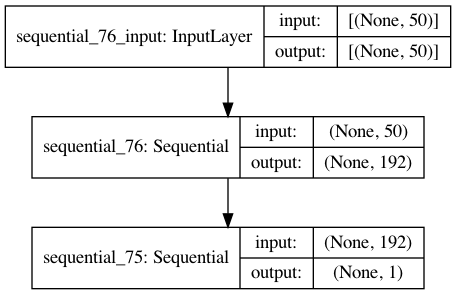

In [50]:
#  creating the three models in the gan
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(n_inputs=192):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    #model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=192):
    model = Sequential()
    model.add(Dense(150, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='sigmoid'))
    return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# size of the latent space
latent_dim = 50 #later 300
# create the discriminator
discriminator = define_discriminator(X.shape[1])
# create the generator
generator = define_generator(latent_dim, X.shape[1])
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
# generate n real samples with class labels
def generate_real_samples(n):
    T = X.shape[1]
    X_real = np.asarray(X.sample(n)).reshape((n,T)) # return n software  192 x n
    # generate class labels
    y_real = np.ones((n, 1))
    # return array of real software vectors and y as label 1 because all are real
    return X_real, y_real
generate_real_samples(3)

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [22]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = np.random.normal(size=latent_dim * n )
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

In [24]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n)
    # predict outputs
    X = np.asarray(generator.predict(x_input)).round()
    X = np.where(X > 0.5, 1, 0)
    # create class labels
    y = np.zeros((n, 1))
    return X, y

In [8]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	#pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	#pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	#pyplot.show()

In [42]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=2000, n_batch=64, n_eval=200):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = np.ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)

In [51]:
# size of the latent space
latent_dim = 50
# create the discriminator
discriminator = define_discriminator(X.shape[1])
# create the generator
generator = define_generator(latent_dim, X.shape[1])
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

199 0.8299999833106995 1.0
399 0.9599999785423279 1.0
599 0.9900000095367432 1.0
799 0.9599999785423279 1.0
999 1.0 0.9900000095367432
1199 0.9700000286102295 1.0
1399 1.0 0.9900000095367432
1599 0.8999999761581421 0.8100000023841858
1799 0.8199999928474426 0.8899999856948853
1999 0.8299999833106995 0.9800000190734863


In [52]:
X_generated, y_generated = generate_fake_samples(generator, 50, 20)

In [53]:
newData = pd.DataFrame(X_generated).T
newData

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
newData.to_excel("data_with_150_hidden.xlsx")

In [54]:
# read in the y_train data set and the predicted software

def calculate_F_score(y_train: pd.DataFrame, predicted_sw: np.array, do_print=False):    
    #print(type(y_train), type(predicted_sw))
    assert y_train.shape[0] == predicted_sw.shape[0]
    
    ones = np.ones(len(y_train))

    occurences = np.array(predicted_sw).T @ ones
    
    F1_list = []
    Software_index = 0
    
    for software in y_train.columns:
        sum_s = y_train[software] @ predicted_sw

        precision = 0
        if occurences != 0:
            precision = sum_s/occurences
        
        number_of_techniques_y = y_train[software] @ ones
        recall = 0
        if number_of_techniques_y != 0:
            recall = sum_s/(number_of_techniques_y)
        F1 = 0
        if (precision + recall) != 0:
            F1 = 2 * precision* recall /(precision + recall)
            
        F1_list.append(F1)
    
    return max(F1_list), F1_list.index(max(F1_list)) ,predicted_sw

In [48]:
for software in newData.columns:
    
    F1, F1Index, _ = calculate_F_score(y_train, np.array(newData[software]))
    print(F1, F1Index)

0.32 69
0.3333333333333333 53
0.3 12
0.30769230769230765 21
0.4615384615384615 47
0.39999999999999997 51
0.4444444444444444 63
0.375 34
0.18181818181818182 53
0.3333333333333333 48
0.4444444444444444 58
0.35294117647058826 70
0.3333333333333333 86
0.39999999999999997 57
0.3 63
0.22222222222222224 26
0.42857142857142855 11
0.30769230769230765 51
0.28571428571428575 31
0.3076923076923077 70


In [55]:
number_of_iterations = 10
examples_to_save = 20
latent_dim = 20

n_epochs=1000
n_batch=64
n_eval=200

df_to_save = pd.DataFrame([])
F1_values = pd.DataFrame([])
maxIndexValues = pd.DataFrame([])


for j in range(number_of_iterations):
    # size of the latent space
    
    # create the discriminator
    discriminator = define_discriminator(X.shape[1])
    # create the generator
    generator = define_generator(latent_dim, X.shape[1])
    # create the gan
    gan_model = define_gan(generator, discriminator)
    # train model
    train(generator, discriminator, gan_model, latent_dim, n_epochs, n_batch, n_eval)

    for i in range(examples_to_save):

        X_generated, y_generated = generate_fake_samples(generator, latent_dim, 1)
        F1, maxIndex, generated_software = calculate_F_score(y_train, np.array(X_generated[0]))

        df_to_save[f"software_{j}{i}"] = generated_software
        print(F1)
        F1_values[f"software_{j}{i}"] = np.array([F1])
        maxIndexValues[f"software_{j}{i}"] = np.array([maxIndex])

print("")
print(pd.DataFrame(F1_values).T[0].describe()[1])
maxIndexValues

199 0.8899999856948853 1.0
399 0.9399999976158142 0.9900000095367432
599 0.9700000286102295 1.0
799 0.9800000190734863 1.0
999 0.9900000095367432 1.0
0.5142857142857143
0.5057471264367815
0.5057471264367815
0.5111111111111111
0.5227272727272727
0.5066666666666667
0.5227272727272727
0.5116279069767442
0.5070422535211268
0.5
0.5227272727272727
0.5
0.5
0.5
0.5287356321839081
0.5111111111111111
0.5057471264367815
0.5057471264367815
0.5227272727272727
0.5287356321839081
199 0.8399999737739563 1.0
399 0.9599999785423279 1.0
599 0.9900000095367432 1.0
799 1.0 1.0
999 0.9800000190734863 1.0
0.45454545454545453
0.45454545454545453
0.45614035087719296
0.45454545454545453
0.45614035087719296
0.47619047619047616
0.4347826086956522
0.4651162790697674
0.4444444444444444
0.45454545454545453
0.45454545454545453
0.45454545454545453
0.45614035087719296
0.45614035087719296
0.4651162790697674
0.47619047619047616
0.4444444444444444
0.4651162790697674
0.45614035087719296
0.4651162790697674
199 0.83999997377

,software_00,software_01,software_02,software_03,software_04,software_05,software_06,software_07,software_08,software_09,...,software_910,software_911,software_912,software_913,software_914,software_915,software_916,software_917,software_918,software_919
0,54,44,44,44,44,54,44,44,54,14,...,14,14,14,14,14,14,14,14,14,14


In [177]:
df_to_save.append(F1_values).append(maxIndexValues).to_excel('GAN_final_result.xlsx')